<a href="https://colab.research.google.com/github/poojanmehta/credit-card-approvals/blob/main/credit_card_approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/application_record.csv')
data = df.copy()

In [4]:
data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0


In [ ]:
data.info()

In [6]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,8.449000e+03,8449.000000,8.449000e+03,8448.000000,8448.000000,8448.0,8448.000000,8448.000000,8448.000000,8448.000000
mean,5.259576e+06,0.397443,1.940897e+05,-16157.039773,64136.688329,1.0,0.172230,0.293205,0.124527,2.169508
std,4.702139e+05,0.693021,1.108447e+05,4174.775729,141968.014868,0.0,0.377603,0.455259,0.330201,0.866846
min,5.008804e+06,0.000000,3.330000e+04,-25140.000000,-14338.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.021534e+06,0.000000,1.260000e+05,-19736.000000,-3266.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.024287e+06,0.000000,1.800000e+05,-15687.000000,-1604.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.029398e+06,1.000000,2.250000e+05,-12627.500000,-396.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,6.790437e+06,4.000000,1.350000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,6.000000


In [8]:
data.shape

(8449, 18)

In [89]:
# Check for null data and fill it with appropriate values

data.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             1
FLAG_MOBIL                1
FLAG_WORK_PHONE           1
FLAG_PHONE                1
FLAG_EMAIL                1
OCCUPATION_TYPE        2591
CNT_FAM_MEMBERS           1
dtype: int64

In [25]:
data['NAME_FAMILY_STATUS'].value_counts().plot(kind='bar')
data['NAME_FAMILY_STATUS'].fillna('Married', inplace=True)

pandas.core.series.Series

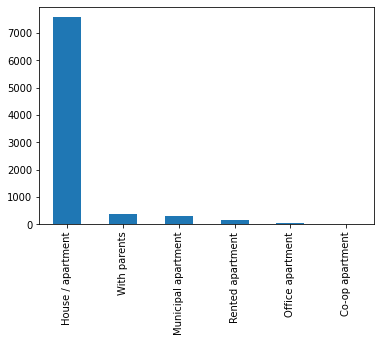

In [30]:
data['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar')
data['NAME_HOUSING_TYPE'].fillna('House / apartment', inplace=True)

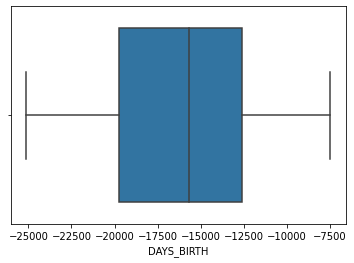

In [47]:
data['DAYS_BIRTH'].plot(kind='kde')
data['DAYS_BIRTH'].fillna(data['DAYS_BIRTH'].mean(), inplace=True)

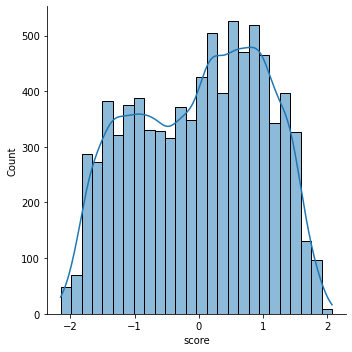

In [88]:
# Now we check for outliers using box plot
sns.boxplot(x=data['DAYS_BIRTH'])

# The feature does not have any outliers
# so we check again using z scores
std_scl = StandardScaler()
std_cov = std_scl.fit_transform(np.array(data['DAYS_BIRTH']).reshape(-1, 1))
std_df = pd.DataFrame(std_cov, columns=['score'])
sns.displot(x=std_df['score'], kde=True)

# We can confirm that featurs does not have any outliers
# and all the values are  between -3 to 3 z-scores